# Initial Model #1
#### By: Group 1 - Anthony Chung, Andrew Tropeano, Russel Coonrod, Jihao Yang
- Table of content
- Reading in data
- Performing EDA
- Dealing with missing
- Dealing with outliers 
- Transforming variables
- Feature Select
- Perform Train_test_split on train data to model
- Stacking models and performing CV

### Above the Dataset
- This dataset is from kaggle.com: Competition House Prices: Advanced Regression Techniques 
- We are given a dataset that consist of 79 features that will help us predict the house prices of Ames, Iowa! Fun!
- The dataset consists of 81 attributes and 1460 observation

In [1]:
# import modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Read in data
df_train = pd.read_csv('train_new.csv')
df_test = pd.read_csv('test_new.csv')
#Save Id of each column to a different df
train_id = df_train['Id']
test_id = df_test['Id']
#Dropping the test id for now
df_train.drop("Id", axis = 1, inplace = True)
df_test.drop("Id", axis = 1, inplace = True)
#Check the shape of training


#Getting test shape and train shape
ntrain =  df_train.shape[0]
ntest = df_test.shape[0]

#Train sale price
y_train = df_train['SalePrice'].values


#Concatenate the two dataset to form all data
all_data = pd.concat((df_train, df_test)).reset_index(drop=True)
all_data.drop(['SalePrice'], axis=1, inplace=True)

all_data.shape

(2920, 54)

In [3]:
df_test.iloc[:,30:41].describe()

,RRAe,1Fam_BldgType,Overall_Total,BrkCmnArea,BrkFaceArea,StoneArea,Exter_Total,Bsmt_Total,Has_BsmtFin,BsmtFinSF_Total,SF_QualFinished
count,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1412.000000,1458.000000,1458.000000,1458.000000
mean,0.011652,0.825908,11.632625,0.803290,78.650446,19.888280,10.971899,11.140935,0.683128,491.823045,1981.819616
std,0.107350,0.379318,1.731474,11.281671,164.809192,85.514696,1.437268,1.656753,0.465417,478.467729,746.087254
min,0.000000,0.000000,3.000000,0.000000,0.000000,0.000000,5.000000,5.000000,0.000000,0.000000,407.000000
25%,0.000000,1.000000,11.000000,0.000000,0.000000,0.000000,10.000000,10.000000,0.000000,0.000000,1490.000000
50%,0.000000,1.000000,12.000000,0.000000,0.000000,0.000000,10.000000,12.000000,1.000000,453.000000,1836.000000
75%,0.000000,1.000000,13.000000,0.000000,90.500000,0.000000,12.000000,12.000000,1.000000,812.000000,2382.000000
max,1.000000,1.000000,17.000000,250.000000,1290.000000,1224.000000,18.000000,16.000000,1.000000,4010.000000,9105.000000


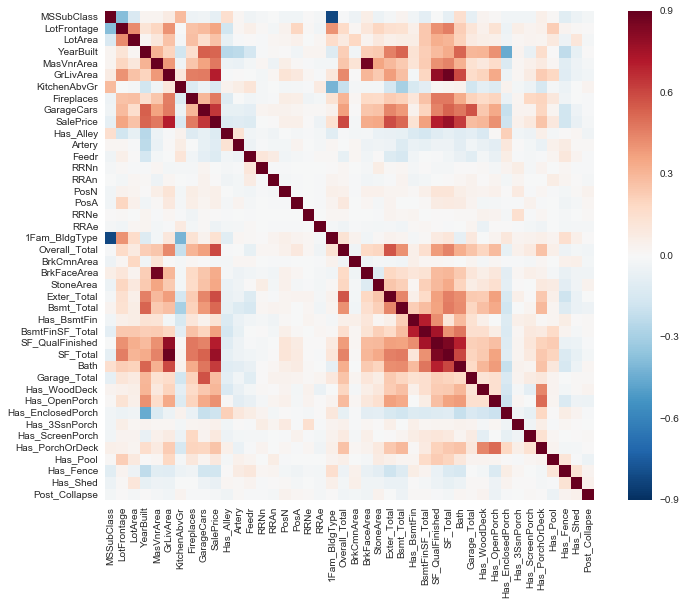

In [4]:
#Do a correlation analysis on the data to look at correlations
traincor = df_train.corr()
plt.subplots(figsize=(12,9))
sns.heatmap(traincor, vmax=0.9, square=True)
plt.show()

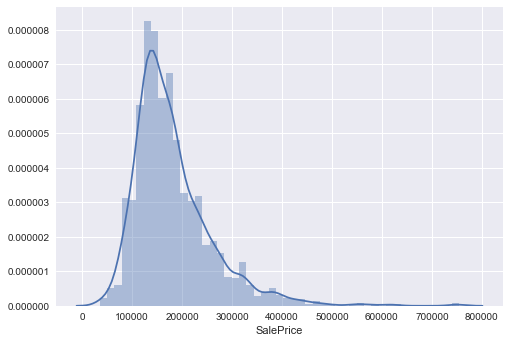

In [5]:
#Perform some EDA to look at the data
#Plot sales price by the count of sale price
g = sns.distplot(df_train['SalePrice'])
plt.show()

In [ ]:
#Neighborhood vs Sale Price
a4_dims = (20 ,10)
fig, ax = plt.subplots(figsize=a4_dims)

neighbor_box = sns.boxplot(ax=ax,x='Neighborhood', y='SalePrice', data=df_train)
plt.show()

In [ ]:
fireplace = df_train[df_train['Fireplaces']==1]
no_fire = df_train[df_train['Fireplaces']==0]

#Fireplace and no fire place vs Sale Price
Fireplace_col = sns.distplot(fireplace['SalePrice'], label='Yes FP')
NoFireplace_col = sns.distplot(no_fire['SalePrice'], label='No FP')
plt.legend()
plt.show()

In [ ]:
#Ground living area, as we see the higher the living area, the higher the saleprice
GrLivArea_box = sns.regplot(x='GrLivArea', y='SalePrice', data=df_train)
plt.show()
# Can Maybe drop the outliers in the bottom right

## Looking at Missing Data

In [ ]:
#Looking of Missing Value in train
all_data_NA = all_data.isnull()
all_data_nan = all_data_NA[all_data_NA == 1].count()
#Drop all columns that have no missing value 
all_data_NaN = all_data_nan[all_data_nan > 0]
all_data_NaN

## Dealing with missing data

In [ ]:
# imputing with Median and Mode
all_data['MSZoning'] = all_data['MSZoning'].fillna('RL')

# Impute the LotFrontage with median by nieghborhood
all_data["LotFrontage"] = all_data.groupby("Neighborhood")["LotFrontage"].transform(lambda x: x.fillna(x.median()))

all_data['MasVnrArea'] = all_data['MasVnrArea'].fillna(all_data['MasVnrArea'].median())

all_data['BsmtExposure']= all_data['BsmtExposure'].fillna('No')

all_data['KitchenQual'] = all_data['KitchenQual'].fillna('Gd')

all_data['Functional'] = all_data['Functional'].fillna('Typ')

all_data['GarageCars']= all_data['GarageCars'].fillna(2)

all_data['SaleType'] = all_data['SaleType'].fillna('WD')

all_data['Bsmt_Total'] = all_data['Bsmt_Total'].fillna(all_data['Bsmt_Total'].median())

all_data['Garage_Total'] = all_data['Garage_Total'].fillna(all_data['Garage_Total'].median())

all_data['Bath'] = all_data['Bath'].fillna(all_data['Bath'].median())

all_data['BsmtFinSF_Total'] = all_data['BsmtFinSF_Total'].fillna(all_data['BsmtFinSF_Total'].median())

all_data['Has_BsmtFin'] = all_data['Has_BsmtFin'].fillna(all_data['Has_BsmtFin'].median())

all_data['SF_QualFinished'] = all_data['SF_QualFinished'].fillna(all_data['SF_QualFinished'].median())

all_data['SF_Total'] = all_data['SF_Total'].fillna(all_data['SF_Total'].median())

In [ ]:
#Looking of Missing Value in train
all_data_NA = all_data.isnull()
all_data_nan = all_data_NA[all_data_NA == 1].count()
#Drop all columns that have no missing value 
all_data_NaN = all_data_nan[all_data_nan > 0]
all_data_NaN

## Transforming variables

In [ ]:
# #Transforming numerical variables
all_data['GrLivArea'] = np.log(all_data['GrLivArea'])

In [ ]:
all_data.info()

In [ ]:
# Create Dummies for the rest of the categorical variables
all_data = pd.get_dummies(all_data)
all_data.shape

# Modeling

In [ ]:
#Get new Train and Test dataset
train =all_data[:ntrain]
test= all_data[ntrain:]

# Creating X and Y 
# y = df_train['SalePrice']
# x = df_train.loc[:, df_train.columns != 'SalePrice']
test.shape

In [ ]:
# Import modules for modeliing
from sklearn.model_selection import KFold, cross_val_score, train_test_split, GridSearchCV, cross_val_predict
from sklearn.linear_model import ElasticNet, Lasso,  BayesianRidge, LassoLarsIC, Ridge
from sklearn.kernel_ridge import KernelRidge
import xgboost as xgb
from sklearn.feature_selection import SelectFromModel, f_regression, RFE
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.ensemble import RandomForestRegressor,  GradientBoostingRegressor
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone
from sklearn.metrics import mean_squared_error

## Feature Selection

In [ ]:
# Using RFE perform feature selection on the dataset
# feature extraction
model = Lasso(alpha =10 ,random_state=4)
rfe = RFE(model, 15)
fit = rfe.fit(train, y_train)
print(fit.n_features_)
fit1 = fit.support_
print(fit.ranking_)

In [ ]:
feature_list = dict(zip(train.columns, fit1))

In [ ]:
#Def function to iterate each key and print out matching input value
def find_key(input_dict, value):
    return {k for k, v in input_dict.items() if v == value}

In [ ]:
#Looking into feature_list and select all thats true, Top 15 Feature selected
top_features = find_key(feature_list, True)
features = list(top_features)
features

In [ ]:
#Recreate new feature list call x_new and use that to predict all models 
x_new = train[features]
#Check shape to ensure it is only using the new x
train.head()

## Creating Baseline Models

In [ ]:
#Set up Ridge regression
ridge = Ridge(alpha = 100, normalize=True)

# Perform 5-fold cross validation
scores = cross_val_score(ridge, train[features], y_train, cv=5)

# Make cross validated predictions
CV_ridge_pred = cross_val_predict(ridge, train[features], y_train, cv=5)

# MSE for validation
rmse= np.sqrt(mean_squared_error(y_train,CV_ridge_pred))
print(rmse/720100)

In [ ]:
# Lasso
lasso = make_pipeline(RobustScaler(), Lasso(alpha =10 ,random_state=4))

# Perform 5-fold cross validation
scores = cross_val_score(lasso, train[features], y_train, cv=5)

# Make cross validated predictions
CV_lasso_pred = cross_val_predict(lasso, train[features], y_train, cv=5)

# MSE for validation
MSE = mean_squared_error(y_train,CV_lasso_pred)
rmse = np.sqrt(mean_squared_error(y_train, CV_lasso_pred))
print(rmse/720100)

In [ ]:
#Perform CV on model to see if the prediction is close
# Param
params = {'lasso__alpha': [0.1, 1.0, 10.0]}
lasso_cv = GridSearchCV(lasso,params, cv=5)
lasso_cv.fit(train[features],y_train)
print(lasso_cv.best_params_)
print(lasso_cv.best_score_)

In [ ]:
# ENEt
ENet = make_pipeline(RobustScaler(), ElasticNet(alpha=533, l1_ratio=.9, random_state=1))

# Perform 5-fold cross validation
scores = cross_val_score(ENet, train[features], y_train, cv=5)

# Make cross validated predictions
CV_ENet_pred = cross_val_predict(ENet, train[features], y_train, cv=5)

# MSE for validation
MSE = mean_squared_error(y_train,CV_ENet_pred )
rmse = np.sqrt(mean_squared_error(y_train, CV_ENet_pred ))
print(rmse/720100)

In [ ]:
#GBoost
GBoost = GradientBoostingRegressor(n_estimators=3000, learning_rate=0.05,max_depth=4, max_features='sqrt',min_samples_leaf=15, min_samples_split=10, loss='huber', random_state =5)
# Perform 5-fold cross validation
scores = cross_val_score(GBoost, train[features], y_train, cv=5)

# Make cross validated predictions
CV_gb_pred = cross_val_predict(GBoost, train[features], y_train, cv=5)

# MSE for validation
MSE = mean_squared_error(y_train,CV_xb_pred )
rmse = np.sqrt(mean_squared_error(y_train, CV_gb_pred ))
print(rmse/720100)

# Stacking Models

In [ ]:
# Using a function to Stack base models with meta models through CV prediction of 5-fold in train data
class StackingAveragedModels(BaseEstimator, RegressorMixin, TransformerMixin):
    def __init__(self, base_models, meta_model, n_folds=5):
        self.base_models = base_models
        self.meta_model = meta_model
        self.n_folds = n_folds
   
    # We again fit the data on clones of the original models
    def fit(self, X, y):
        self.base_models_ = [list() for x in self.base_models]
        self.meta_model_ = clone(self.meta_model)
        kfold = KFold(n_splits=self.n_folds, shuffle=True, random_state=156)
        
        # Train cloned base models then create out-of-fold predictions
        # that are needed to train the cloned meta-model
        out_of_fold_predictions = np.zeros((X.shape[0], len(self.base_models)))
        for i, model in enumerate(self.base_models):
            for train_index, holdout_index in kfold.split(X, y):
                instance = clone(model)
                self.base_models_[i].append(instance)
                instance.fit(X[train_index], y[train_index])
                y_pred = instance.predict(X[holdout_index])
                out_of_fold_predictions[holdout_index, i] = y_pred
                
        # Now train the cloned  meta-model using the out-of-fold predictions as new feature
        self.meta_model_.fit(out_of_fold_predictions, y)
        return self
   
    #Do the predictions of all base models on the test data and use the averaged predictions as 
    #meta-features for the final prediction which is done by the meta-model
    def predict(self, X):
        meta_features = np.column_stack([
            np.column_stack([model.predict(X) for model in base_models]).mean(axis=1)
            for base_models in self.base_models_ ])
        return self.meta_model_.predict(meta_features)

In [ ]:
#XGBoost
model_xgb = xgb.XGBRegressor(colsample_bytree=0.4603, gamma=0.0468, learning_rate=0.05, max_depth=3, min_child_weight=1.7817, n_estimators=2200,reg_alpha=0.4640, reg_lambda=0.8571,subsample=0.5213, silent=1, random_state =7, nthread = -1)
stacked_averaged_models = StackingAveragedModels(base_models = (ENet, GBoost,ridge, lasso), meta_model = model_xgb)

stacked_averaged_models.fit(x_new.values, y_train)
stacked_train_pred = stacked_averaged_models.predict(train[features].values)
stacked_pred = (stacked_averaged_models.predict(test[features].values))
print(mean_squared_error(y_train, stacked_train_pred))
print(rmse/720100)

In [ ]:
# final_pred = pd.DataFrame()
# final_pred['Id'] = test_id
# final_pred['SalePrice'] = stacked_pred
# final_pred.to_csv('Competition#2_Final_Prediction.csv', index= False)

In [ ]:
train_price = pd.read_csv('train.csv')
test_price = pd.read_csv('Competition#2_Test_results.csv')

In [ ]:
GrLivArea_box = sns.regplot(x='GrLivArea', y='SalePrice', data=train_price, label='train')
test = sns.regplot(x='GrLivArea', y='SalePrice', data = test_price, label='Predicted')
plt.legend()
plt.show()

In [ ]:
#Group by Fire Colcreek in Sale Price
colcreek = df_train[df_train['Neighborhood']== "CollgCr"]

colcreek_fire = colcreek[colcreek['Fireplaces']==1]
colcreek_No = colcreek[colcreek['Fireplaces']==0]

#Fireplace and no fire place for sale price in Colcreek Sale Price
Fireplace_col = sns.distplot(colcreek_fire['SalePrice'], label='Yes FP')
NoFireplace_col = sns.distplot(colcreek_No['SalePrice'], label='No FP')
plt.legend()
plt.show()